In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


/home/rust/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [8]:
sns.set(style="whitegrid")
df = pd.read_csv('supply_chain_data.csv')
#to display first few rows
print(df.head(10))
df.describe()

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   
5     haircare  SKU5   1.699976            87                      147   
6     skincare  SKU6   4.078333            48                       65   
7    cosmetics  SKU7  42.958384            59                      426   
8    cosmetics  SKU8  68.717597            78                      150   
9     skincare  SKU9  64.015733            35                      980   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Femal

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


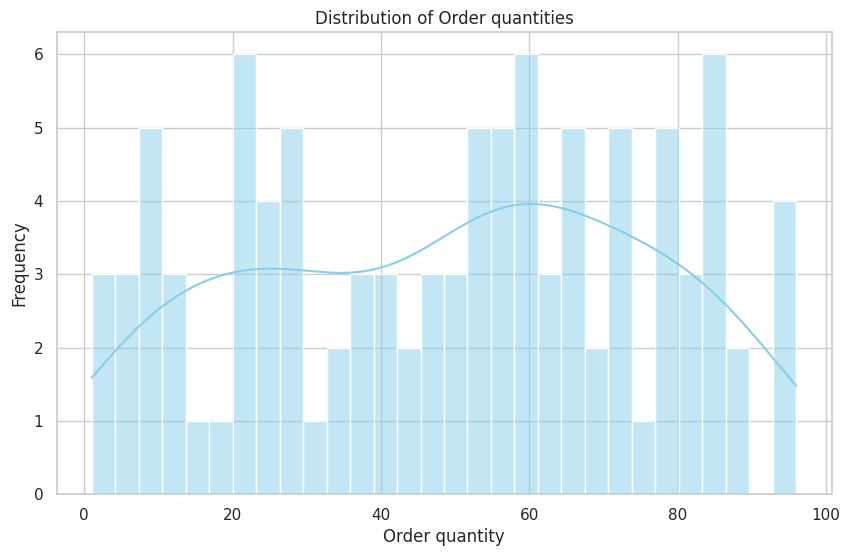

In [9]:
#point first- distribution of order quantities
plt.figure(figsize=(10,6))
sns.histplot(df['Order quantities'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Order quantities')
plt.xlabel('Order quantity')
plt.ylabel('Frequency')
plt.show()

Supplier name
Supplier 1    27
Supplier 2    22
Supplier 5    18
Supplier 4    18
Supplier 3    15
Name: count, dtype: int64


/tmp/ipykernel_4869/2533694041.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette='viridis')


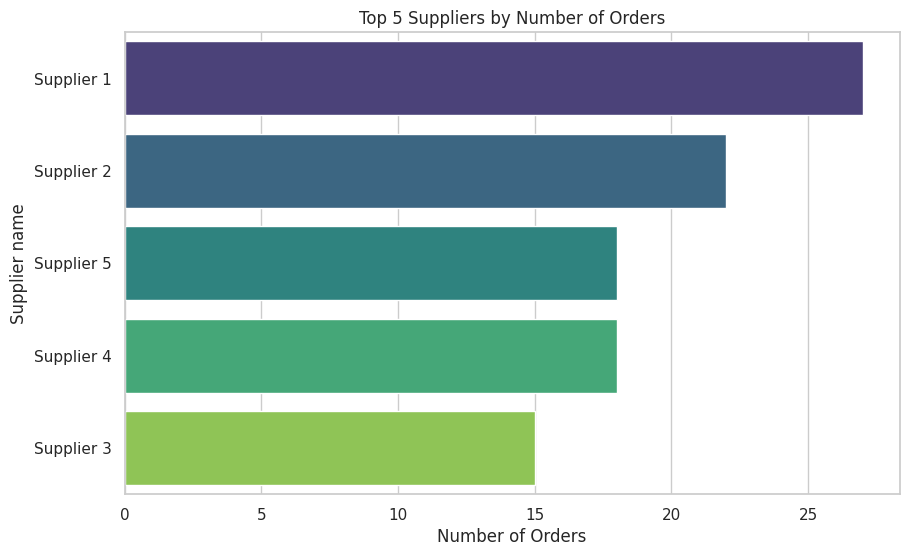

In [10]:
#point second- identifying top supplier based on number of orders
top_suppliers = df['Supplier name'].value_counts().head(10)
print(top_suppliers)# to check

plt.figure(figsize=(10, 6))
sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette='viridis')
plt.title('Top 5 Suppliers by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Supplier name')
plt.show()

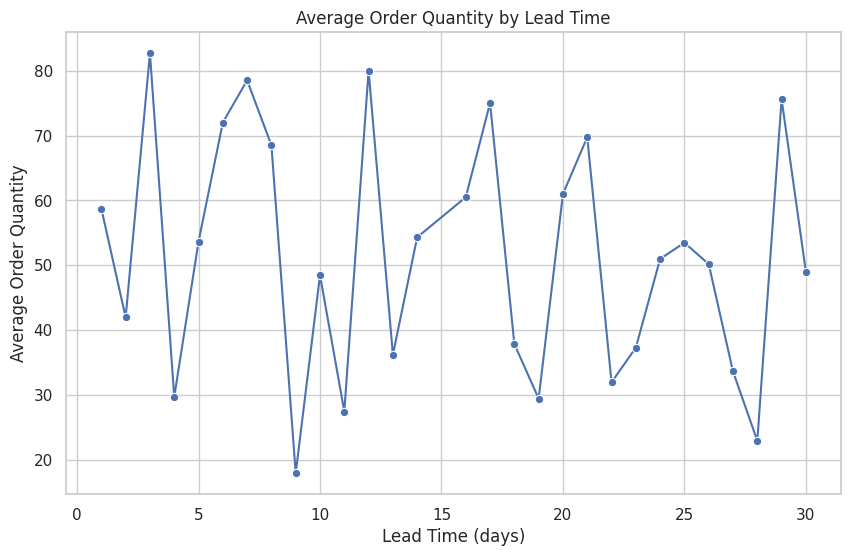

In [11]:
#Point fourth- trend of order quantities over lead time
leadtime_group = df.groupby('Lead time')['Order quantities'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=leadtime_group, x='Lead time', y='Order quantities', marker='o')
plt.title('Average Order Quantity by Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Order Quantity')
plt.show()

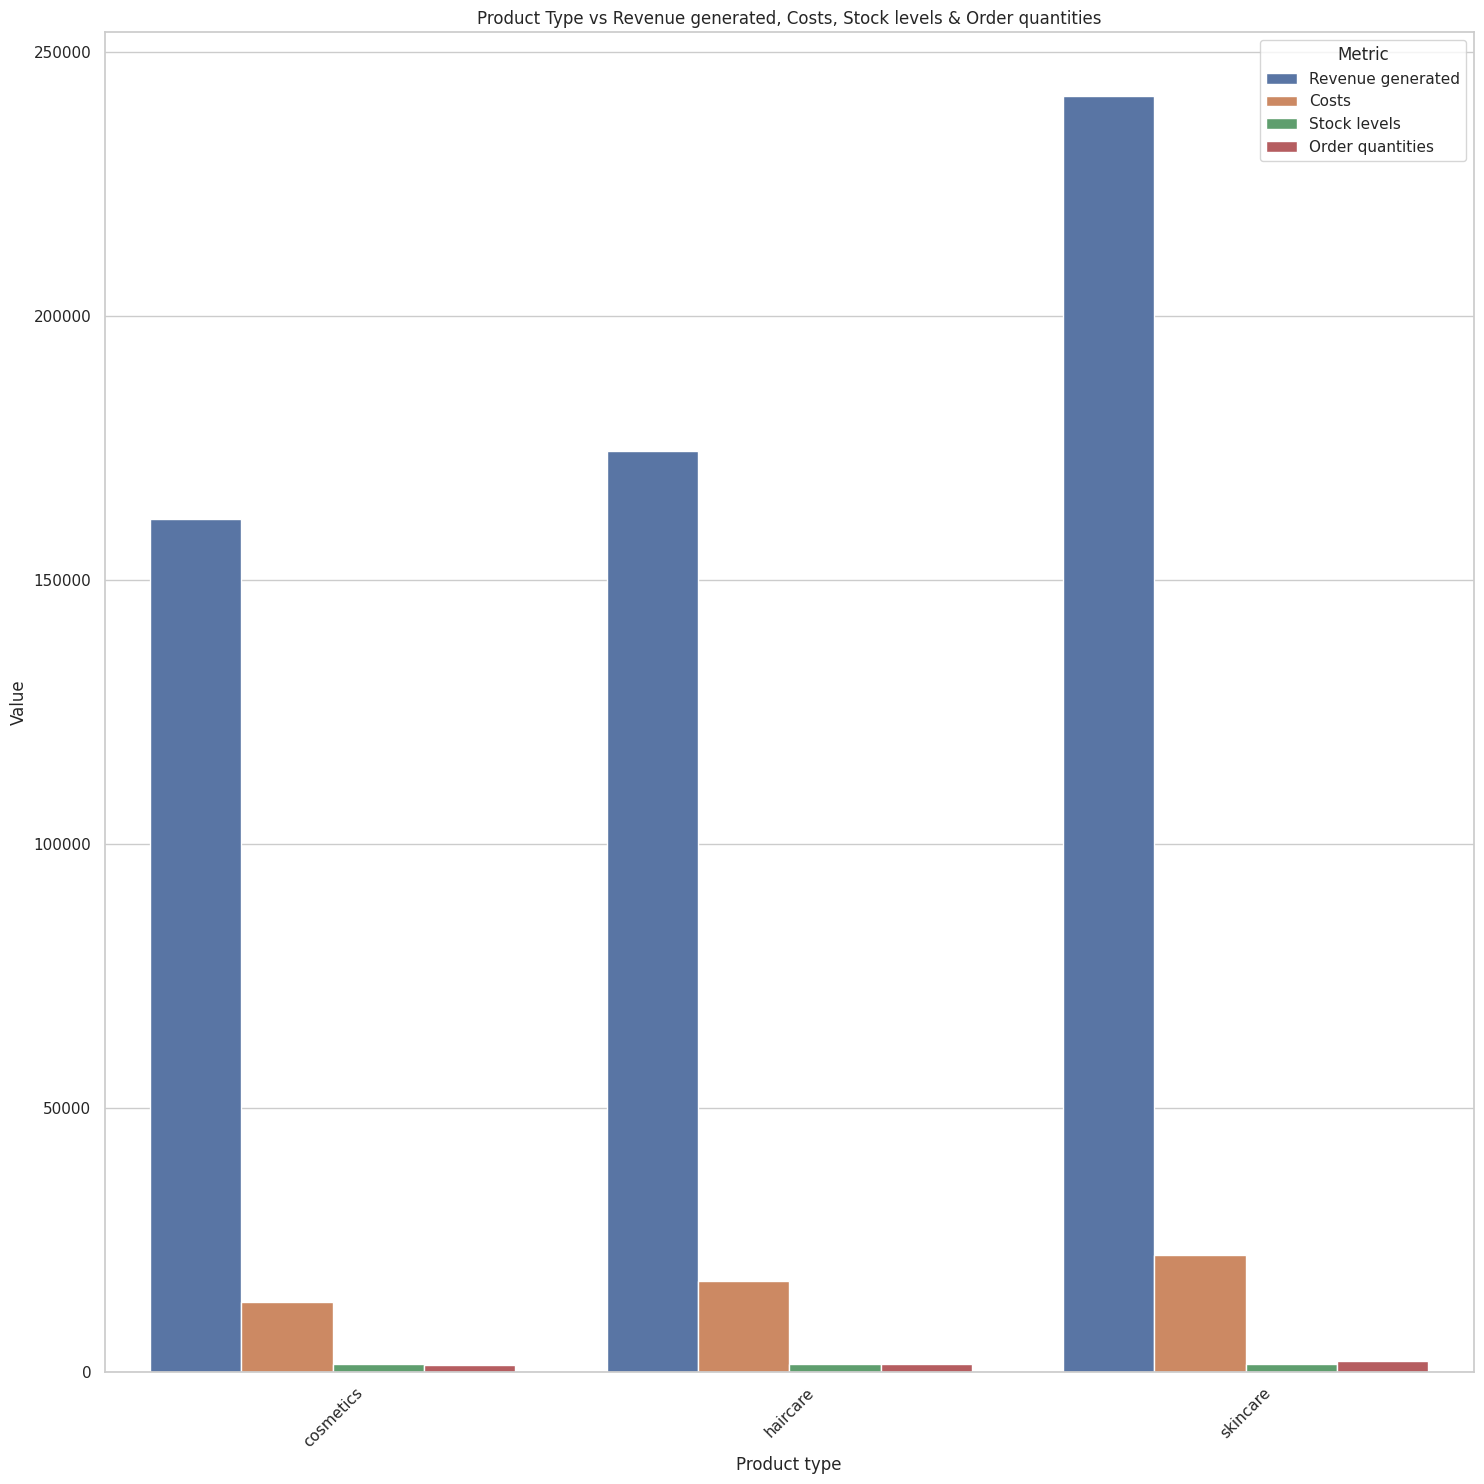

In [17]:
#Point fifth product type vs revenue, costs, stock levels and order quantities

# Group by Product-type
product_group = df.groupby('Product type')[['Revenue generated', 'Costs', 'Stock levels', 'Order quantities']].sum().reset_index()

# melt for plotting easily
melted = product_group.melt(id_vars='Product type', var_name='Metric', value_name='Value')

plt.figure(figsize=(15, 15))
sns.barplot(data=melted, x='Product type', y='Value', hue='Metric')
plt.title('Product Type vs Revenue generated, Costs, Stock levels & Order quantities')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()
#Here, we can see that skincare generates the most revenue followed by haircare and cosmetics

In [13]:
#Point sixth- Fiding average lead time
average_lead_time = df['Lead times'].mean()
print(f"Average Lead Time: {average_lead_time:.2f} days")

Average Lead Time: 15.96 days
